In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Text(0, 0.5, 'Daily Vehicle Miles Traveled')

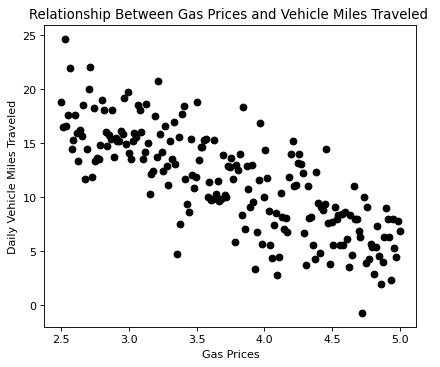

In [16]:
#Create simulated data for population model

# Model:
# VMT ~ B0 + B1*GasPrice + u

#Set Seed
np.random.seed(5)
n = 200;

#Set coefficients for data generation process
B0 = 30 ; B1 = -5; sigma = 3
u = np.random.normal( 0, sigma, n )

#Determine X and y arrays
GasPrice = np.linspace(2.5, 5, n)
VMT = B0 + B1*GasPrice + u

#Plot Data
plt.figure(figsize=(6, 5), dpi=80)
plt.plot(GasPrice, VMT, 'ob', color='black')
plt.title("Relationship Between Gas Prices and Vehicle Miles Traveled ") 
plt.xlabel("Gas Prices") 
plt.ylabel("Daily Vehicle Miles Traveled") 


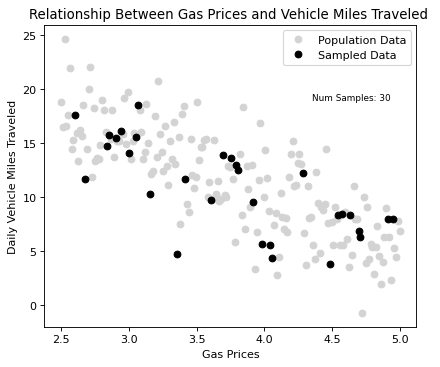

In [17]:
#Create plot with a sample of data highlighted

#Simulate more data
sample_pct = .15

#Determine X and y arrays
GasPrice = np.linspace(2.5, 5, n )
VMT = B0 + B1*GasPrice + u

#Turn data into a Data frame
df = pd.DataFrame(data={"Gas":GasPrice, "VMT":VMT})
pop, sample  = train_test_split(df, test_size=sample_pct)

#Plot Data
plt.figure(figsize=(6, 5), dpi=80)
plt.plot(pop['Gas'], pop['VMT'], 'ob', color='lightgray', label="Population Data")
plt.plot(sample['Gas'], sample['VMT'], 'ob', color='black', label="Sampled Data")

plt.title("Relationship Between Gas Prices and Vehicle Miles Traveled ") 
plt.xlabel("Gas Prices") 
plt.ylabel("Daily Vehicle Miles Traveled") 
plt.text(4.35, 19, 'Num Samples: ' + str(round(n*sample_pct)), fontsize=8)
plt.legend()


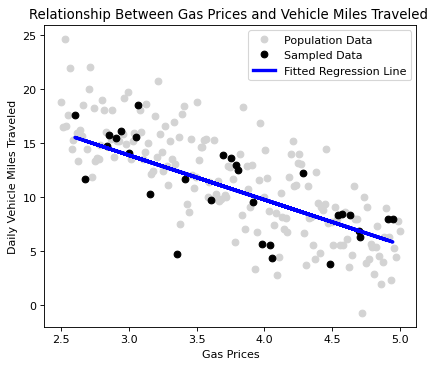

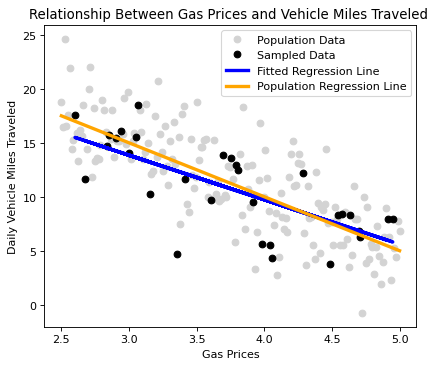

In [18]:
#Estimate simple linear model 

#Reshape data
X, y = [ sample['Gas'].values.reshape(-1, 1), 
        sample['VMT'].values.reshape(-1, 1) ]

#Fit model
regr = linear_model.LinearRegression()
regr.fit( X,y)
VMT_pred = regr.predict( X )

#Plots
for i in range(0,2):
    #Baseline plot
    plt.figure(figsize=(6, 5), dpi=80)
    plt.plot(pop['Gas'], pop['VMT'], 'ob', color='lightgray', label="Population Data")
    plt.plot(X, y, 'ob',  color="black", label='Sampled Data')
    plt.plot(X, VMT_pred, color="blue", linewidth=3, label="Fitted Regression Line")
    plt.title("Relationship Between Gas Prices and Vehicle Miles Traveled ") 
    plt.xlabel("Gas Prices") 
    plt.ylabel("Daily Vehicle Miles Traveled") 
    plt.legend()
    
    if i==1:
        #Plot again, but add true regression line
        plt.plot(GasPrice,  B0 + B1*GasPrice, linewidth=3,  color="orange", label='Population Regression Line')
        plt.legend()

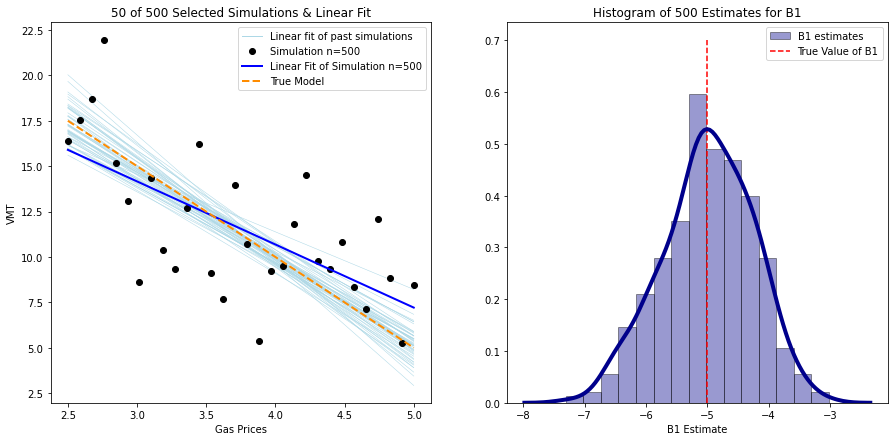

In [19]:
#Simulating multiple datasets and plotting the normal distribution of B1 coefficients

n_sim = 500
obs=30
B1_list = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
for n in range(1, n_sim):
    
    #Set Seed
    np.random.seed(n+1)

    #Draw random shocks
    u = np.random.normal( 0, sigma, obs )

    #Determine X and y arrays
    GasPrice = np.linspace(2.5, 5, obs)
    VMT = B0 + B1*GasPrice + u
    
    #Estimate simple linear model 
    regr = linear_model.LinearRegression()
    regr.fit(GasPrice.reshape(-1, 1), VMT)
    VMT_pred = regr.predict( GasPrice.reshape(-1, 1))
    
    #Plot
    
    #Plot light blue regression lines
    if n%10==0 and n!=490:
        ax1.plot(GasPrice, VMT_pred, color="lightblue", linewidth=.5)
    if n==n_sim-10:
         ax1.plot(GasPrice, VMT_pred, color="lightblue", linewidth=1, label="Linear fit of past simulations") 
    #Plot one dark blue regression line with data
    elif n==n_sim-1:
        ax1.plot(GasPrice, VMT, 'ob',  color="black", label="Simulation n=500")
        ax1.plot(GasPrice, VMT_pred, color="blue", linewidth=2, label="Linear Fit of Simulation n=500")
    
    B1_list.append(regr.coef_[0])

#Plot True model
ax1.plot(GasPrice, B0+GasPrice*B1, color="darkorange", linestyle="--", linewidth=2, label="True Model")

#Plot histogram/KDensity plot of B1 estimates
sns.distplot(B1_list, hist=True, kde=True, 
             bins=15, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             ax = ax2, label="B1 estimates")
ax2.vlines(x = B1, ymin = 0, ymax = .7,
           colors = 'red',linestyle="--",
           label = 'True Value of B1')

#Set titles
ax1.set_title("50 of 500 Selected Simulations & Linear Fit")
ax1.set_ylabel("VMT"); ax1.set_xlabel("Gas Prices")
ax1.legend()

ax2.set_title("Histogram of 500 Estimates for B1")
ax2.set_xlabel("B1 Estimate")
ax2.legend()


/Users/coltonlapp/opt/anaconda3/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


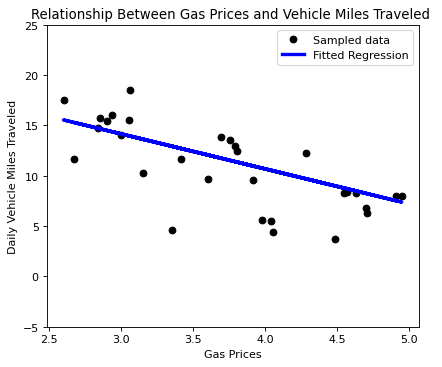

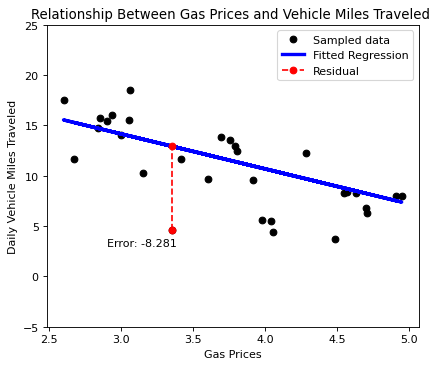

In [23]:

#Get one specific x,y pair for predicted and true y values
x_val = sample['Gas'].iloc[16].copy()
y_true = sample['VMT'].iloc[16].copy()
y_pred = regr.predict( x_val.reshape(-1, 1))

#Plot
for i in range(0,2):
    X, y = [sample['Gas'].copy(), sample['VMT'].copy()]
    plt.figure(figsize=(6, 5), dpi=80)
    plt.plot(X, y, 'ob',  color="black", label='Sampled data')
    plt.plot(X, regr.predict( X.values.reshape(-1,1) ) , color="blue", linewidth=3, label='Fitted Regression')
    plt.title("Relationship Between Gas Prices and Vehicle Miles Traveled ") 
    plt.xlabel("Gas Prices") 
    plt.ylabel("Daily Vehicle Miles Traveled") 
    plt.ylim( (-5, 25))
    plt.legend()
    
    if i==1:
        plt.plot( [x_val,x_val] , [y_true, y_pred], 'bo', linestyle="--", color='red', label='Residual')
        plt.text(2.9, 3, "Error: " + str( round( (y_true - y_pred )[0], 3) ), fontsize=10)
        plt.legend()
 

Estimated model: 
 intercept:  [50.30977098] 
 B1:  [[-5.66692004]]
Average Y Value:  29.058820837231256


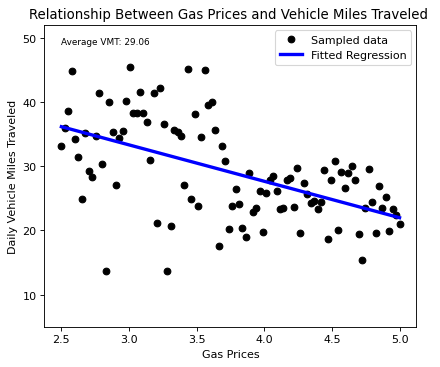

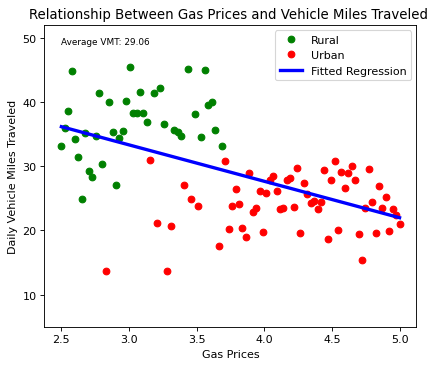

In [30]:
#Show effect of omitted variable bias

#Model: VMT = B0 + B1*Prices + B2*Rural + u
B0 = 15
B1 = 2 #Effect of prices
B2 = 15 #Effect or rural/urban (rural=1)
sigma = 5

#Set Seed
np.random.seed(n+1)
obs = 100

#Draw random shocks
u = np.random.normal( 0, sigma, obs )

#Determine X and y arrays
GasPrice = np.linspace(2.5, 5, obs)

#Create corresponding "rural" array that correlates with gas prices
#i.e. low gas prices = higher probability that someone is rural

rural_list = []
for i in GasPrice:
    std_val = 5 * (i - 3.5 ) #normalized around 0
    log_val = 1 / (1 + np.e**(-std_val))
    rural_list.append( 1 - np.random.binomial(1, log_val, 1)[0] )
Rural = np.array(rural_list)
VMT = B0 + B1*GasPrice + B2*Rural+ u
  
    
    
#Fit model
X, y = [ GasPrice.reshape(-1, 1), 
        VMT.reshape(-1, 1) ]

regr = linear_model.LinearRegression()
regr.fit( X,y)
VMT_pred = regr.predict( X )
    
#Plot    
for i in range(0,2):
    plt.figure(figsize=(6, 5), dpi=80)    
    
    #Baseline
    if i ==0:
        plt.plot(X, y, 'ob',  color="black", label='Sampled data')
    #Rural/Urban breakdown
    elif i==1:
        plt.plot(X[Rural==1], y[Rural==1], 'ob',  color="green", label='Rural')
        plt.plot(X[Rural==0], y[Rural==0], 'ob',  color="red", label='Urban')
        
    plt.plot(X, regr.predict( X.reshape(-1,1) ) , color="blue", linewidth=3, label='Fitted Regression')
    plt.title("Relationship Between Gas Prices and Vehicle Miles Traveled ") 
    plt.xlabel("Gas Prices") 
    plt.ylabel("Daily Vehicle Miles Traveled") 
    plt.ylim( (5, 52))
    plt.text(2.5, 49, "Average VMT: "+ str(round(np.mean(VMT),2)), fontsize=8 )
    plt.legend()

print("Estimated model: \n intercept: ", regr.intercept_ , "\n B1: ", regr.coef_)
print("Average Y Value: ", np.mean(VMT))


Estimated model: 
 intercept:  [14.89491949] 
 B1:  [[4.21704036]]
Average Y Value:  30.708820837231254


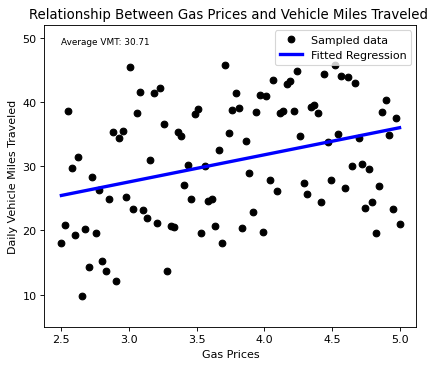

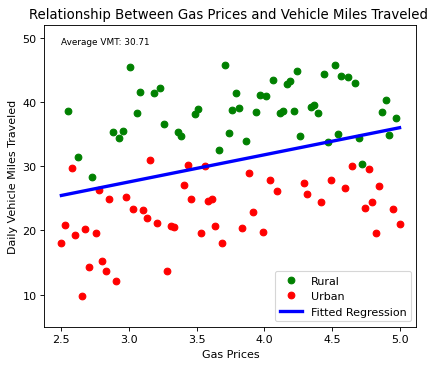

In [29]:
#Repeat cell above, but have rural not be correlated with prices

#Model: VMT = B0 + B1*Prices + B2*Rural + u
B0 = 15
B1 = 2 #Effect of prices
B2 = 15 #Effect or rural/urban (rural=1)
sigma = 5

#Set Seed
np.random.seed(n+1)
obs = 100

#Draw random shocks
u = np.random.normal( 0, sigma, obs )

#Determine X and y arrays
GasPrice = np.linspace(2.5, 5, obs)

#Create corresponding "rural" array that correlates with gas prices
#i.e. low gas prices = higher probability that someone is rural

rural_list = []
for i in GasPrice:
    rural_list.append( 1 - np.random.binomial(1, .5, 1)[0] )
Rural = np.array(rural_list)
VMT = B0 + B1*GasPrice + B2*Rural+ u
  
    
    
#Fit model
X, y = [ GasPrice.reshape(-1, 1), 
        VMT.reshape(-1, 1) ]

regr = linear_model.LinearRegression()
regr.fit( X,y)
VMT_pred = regr.predict( X )
    
#Plot    
for i in range(0,2):
    plt.figure(figsize=(6, 5), dpi=80)    
    
    #Baseline
    if i ==0:
        plt.plot(X, y, 'ob',  color="black", label='Sampled data')
    #Rural/Urban breakdown
    elif i==1:
        plt.plot(X[Rural==1], y[Rural==1], 'ob',  color="green", label='Rural')
        plt.plot(X[Rural==0], y[Rural==0], 'ob',  color="red", label='Urban')
        
    plt.plot(X, regr.predict( X.reshape(-1,1) ) , color="blue", linewidth=3, label='Fitted Regression')
    plt.title("Relationship Between Gas Prices and Vehicle Miles Traveled ") 
    plt.xlabel("Gas Prices") 
    plt.ylabel("Daily Vehicle Miles Traveled") 
    plt.ylim( (5, 52))
    plt.text(2.5, 49, "Average VMT: "+ str(round(np.mean(VMT),2)), fontsize=8 )
    plt.legend()

print("Estimated model: \n intercept: ", regr.intercept_ , "\n B1: ", regr.coef_)
print("Average Y Value: ", np.mean(VMT))
